<img src="./images/ecommerce-banner.png">

# Advising an Ecommerce Business

**Shaun Chua**
<br> 2 July 2020

---

## Contents:
- [**1. Importing Libraries**](#1)
- [**2. Importing Dataset**](#2)
- [**3. Exploratory Data Analysis** ](#3)
- [**4. Preprocessing**](#4)
- [**5. Modelling**](#5)
- [**6. Conclusion and Recommendations**](#6)

 <a id='1'></a> 

# 1. Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as test
import scipy.stats as stats

import sklearn as sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

# To get notebook runtime
import time

%matplotlib inline

In [2]:
# Starting timer for notebook

t0 = time.time()

<a id='2'></a>

# 2. Importing Dataset

In [3]:
customers = pd.read_csv('./datasets/Ecommerce Customers')

<a id='3'></a>

# 3. Exploratory Data Analysis

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### **Comments:**
---

`Yearly Amount Spent` will most likely be the response variable for this project.

To help the ecommerce business grow by increasing `Yearly Amount Spent`, it may be worth focusing on the numerical features for analysis. 

However, it may also be worth considering the categorical features. 

In [7]:
# Getting the number of unique values for each categorical feature

cat_features = ['Email', 'Address', 'Avatar']

for feature in cat_features:
    print(f'{feature} has {customers[feature].nunique()} unique values.')

Email has 500 unique values.
Address has 500 unique values.
Avatar has 138 unique values.


### **Comments:**
---

The categorical features are not likely to provide much insight. `Email` and `Address` have 500 unique values each, while `Avatar` has 138 unique values.

<a href='https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/'> Categorical encoding</a> will not likely be useful for analysis, particularly since there are only 500 total observations for this dataset. 

Therefore, I will only consider the numerical features.  

## Pairplots

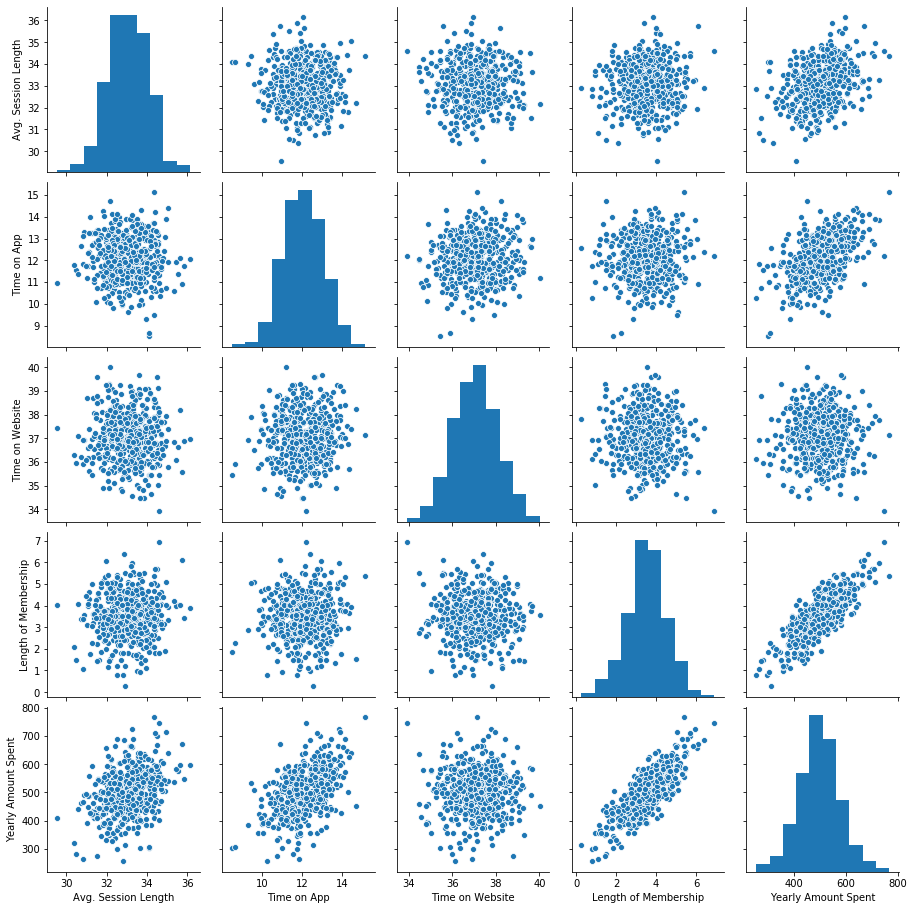

In [8]:
# Creating a pairplot to visualise relationships bewteen features and the response variable

sns.pairplot(customers, palette='Greens', markers='o')

## Scatterplots - All Features against `Yearly Amount Spent`

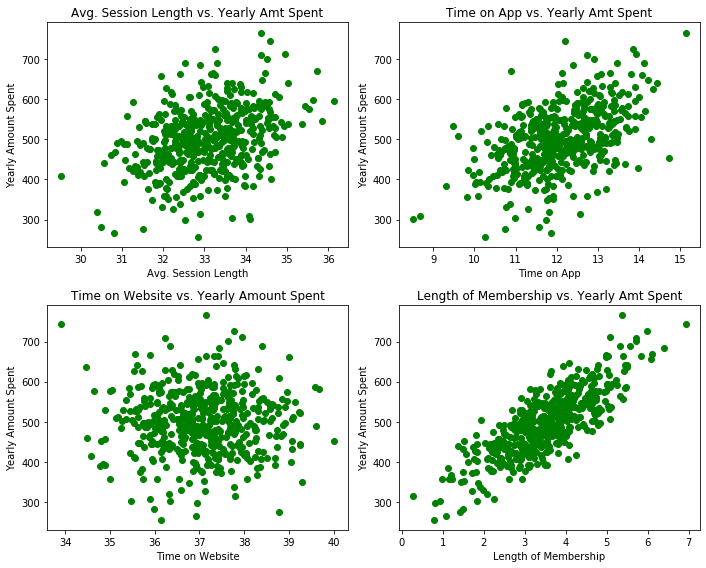

In [9]:
fig, ax = plt.subplots(2,2, figsize=(10,8))

ax[0,0].scatter(customers['Avg. Session Length'], customers['Yearly Amount Spent'], color='green')
ax[0,0].set_ylabel('Yearly Amount Spent')
ax[0,0].set_xlabel('Avg. Session Length')
ax[0,0].set_title('Avg. Session Length vs. Yearly Amt Spent')

ax[0,1].scatter(customers['Time on App'], customers['Yearly Amount Spent'], color='green')
ax[0,1].set_ylabel('Yearly Amount Spent')
ax[0,1].set_xlabel('Time on App')
ax[0,1].set_title('Time on App vs. Yearly Amt Spent')

ax[1,0].scatter(customers['Time on Website'], customers['Yearly Amount Spent'], color='green')
ax[1,0].set_ylabel('Yearly Amount Spent')
ax[1,0].set_xlabel('Time on Website')
ax[1,0].set_title('Time on Website vs. Yearly Amount Spent')

ax[1,1].scatter(customers['Length of Membership'], customers['Yearly Amount Spent'], color='green')
ax[1,1].set_ylabel('Yearly Amount Spent')
ax[1,1].set_xlabel('Length of Membership')
ax[1,1].set_title('Length of Membership vs. Yearly Amt Spent')

plt.tight_layout()

### **Comments:**
---


It would seem that `Length of Membership` potentially has the **strongest linear correlation** with `Yearly Amount Spent`. 

There seems to be a **weak linear** relationship between `Time on App` and `Yearly Amount Spent`. 

There seems to be **no linear relationship** between `Avg. Session Length`, `Time on Website`, and `Yearly Amount Spent`.

I'll take a closer look using `jointplots`.

## Jointplot -  `Avg. Session Length` vs. `Yearly Amount Spent`

C:\Users\Shaun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


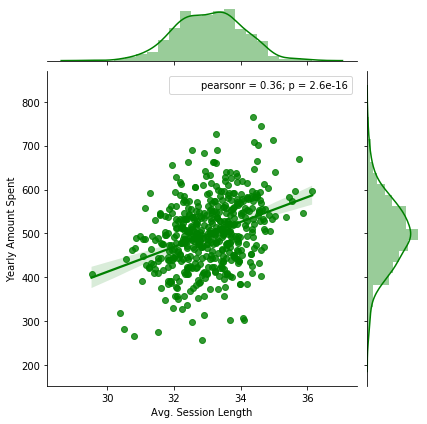

In [10]:
sns.jointplot(x='Avg. Session Length', 
              y='Yearly Amount Spent', 
              data=customers, 
              kind='reg', 
              color='green', 
              space=0.2).annotate(stats.pearsonr)

## Jointplot -  `Time on App` vs. `Yearly Amount Spent`

C:\Users\Shaun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


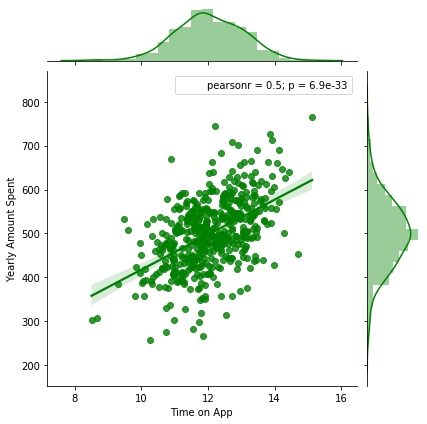

In [11]:
sns.jointplot(x='Time on App', 
              y='Yearly Amount Spent', 
              data=customers, 
              kind='reg', 
              color='green', 
              space=0.2).annotate(stats.pearsonr)

## Jointplot -  `Time on Website` vs. `Yearly Amount Spent`

C:\Users\Shaun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


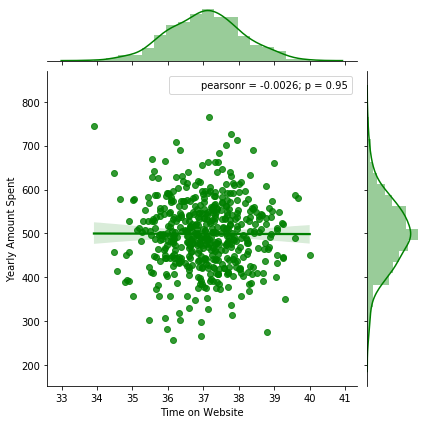

In [12]:
sns.jointplot(x='Time on Website', 
              y='Yearly Amount Spent', 
              data=customers, 
              kind='reg', 
              color='green', 
              space=0.2).annotate(stats.pearsonr)

## Jointplot -  `Length of Membership` vs. `Yearly Amount Spent`

C:\Users\Shaun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


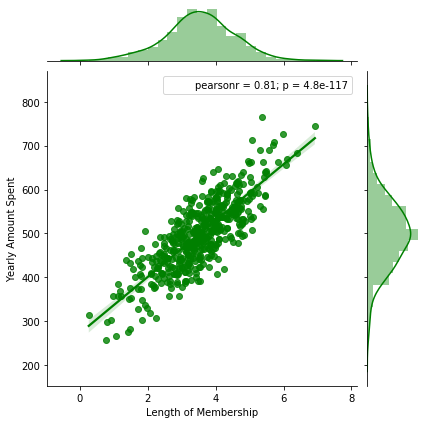

In [13]:
sns.jointplot(x='Length of Membership', 
              y='Yearly Amount Spent', 
              data=customers, 
              kind='reg', 
              color='green', 
              space=0.2).annotate(stats.pearsonr)

### **Comments:**
---

From the jointplots, it would seem that `Length of Membership` and `Time on App` are the features which are likely to have a linear correlation with `Yearly Amount Spent`.

I'll now utilise a **Hexbin Plot** to try and gain more insight. 

## Hexbin Plot - `Avg. Session Length` vs `Yearly Amount Spent`

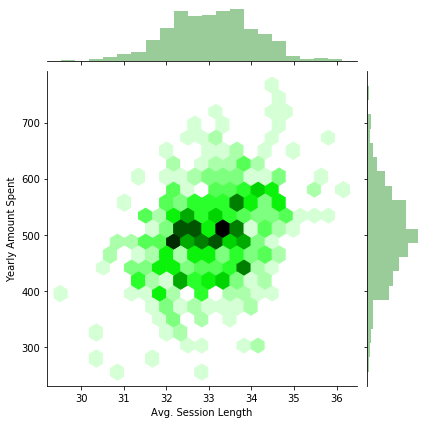

In [14]:
sns.jointplot(x='Avg. Session Length',
              y='Yearly Amount Spent', 
              data=customers, 
              color='Green', 
              kind='hex')

## Hexbin Plot - `Time on App` Vs `Yearly Amount Spent`

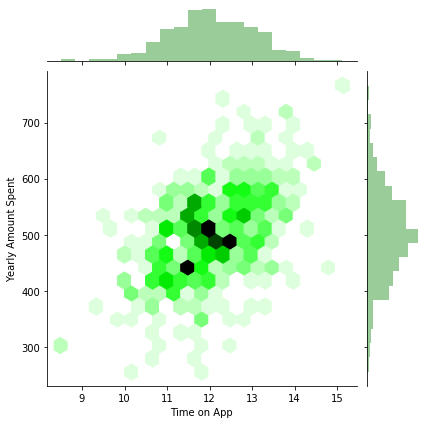

In [15]:
sns.jointplot(x='Time on App', 
              y='Yearly Amount Spent', 
              data=customers, 
              color='Green', 
              kind='hex')

## Hexbin Plot - `Time on Website` vs `Yearly Amount Spent`

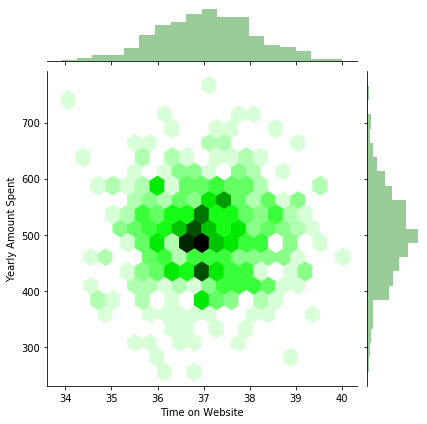

In [16]:
sns.jointplot(x='Time on Website',
              y='Yearly Amount Spent', 
              data=customers, 
              color='Green', 
              kind='hex')

## Hexbin Plot - `Length of Membership` vs `Yearly Amount Spent`

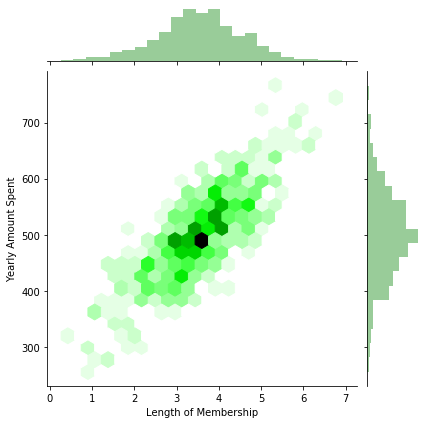

In [17]:
sns.jointplot(x='Length of Membership',
              y='Yearly Amount Spent', 
              data=customers, 
              color='Green', 
              kind='hex')

### Comments:

---

From the **Hexbin Plots**, here are my findings:

**Avg. Session Length vs Yearly Amount Spent:**
<br> 32-34 min was the most common avg. session length, and it was accompanied with approximately a 500 yearly amount spent 

**Time on App vs Yearly Amount Spent:**
<br> 11.5-13 min was the most common time spent on the App, and it was accompanied with approximately a 300 - 500 yearly amount spent 

**Time on Website vs Yearly Amount Spent:**
<br> 36.5-37 min was the most common time spent on the Website, and it was accompanied with approximately a 400 - 500 yearly amount spent 

**Length of Membership vs Yearly Amount Spent:**
<br> 3-4 years membership was the most common membership length, and it was accompanied with approximately a 500 yearly amount spent 

<a id='4'></a>

# 4. Preprocessing

## Setting Features and Target

In [18]:
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']

In [19]:
target = ['Yearly Amount Spent']

## Train-Test-Split

In [20]:
X = customers[features]
y = customers[target]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=708)

<a id='5'></a>

# 5. Modelling

## Model Instantiation

In [24]:
lr = LinearRegression()

## Training Data

In [25]:
# Fitting Training Data

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Train R2 Score

train_r2 = lr.score(X=X_train, y=y_train)
train_r2

0.9834677063068539

In [27]:
explained_variance_score(y_train, lr.predict(X_train))

0.9834677063068539

In [28]:
# Train RMSE Score

train_rmse = mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train), squared=False)
train_rmse

10.021692360604849

In [29]:
np.sqrt(mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train)))

10.021692360604849

### Comments:
---

**Training $R^2$ $\approx$ 0.983**
<br> The training $R^2$ score indicates that about 98.3% of the variation in `Yearly Amount Spent` can be explained by the features included in the Linear Regression model.

This means that 98.3% of `Yearly Amount Spent` is predictable from the features.

**Training RMSE $\approx$ 10.02**
<br> The training RMSE indicates that using the features to predict `Yearly Amount Spent` may result in approxmiately a $10.02 deviation from the actual value, which is acceptable in this context.

## Test Data

In [30]:
# Test R2 Score

test_r2 = lr.score(X_test, y_test)
test_r2

0.9862360916756345

In [31]:
# Test explained_variance_ratio 

explained_variance_score(y_test, lr.predict(X_test))

0.9863841132258218

### Comments:
---
This <a href='https://stackoverflow.com/questions/24378176/python-sci-kit-learn-metrics-difference-between-r2-score-and-explained-varian'>link</a> explains the reason for the difference in $R^2$ Score and the Explained Variance Score.

Essentially it boils down to mean residue, but for the purposes of this project, they will be treated as equivalent.

In [32]:
# Test RMSE Score

test_rmse = mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test), squared=False)
test_rmse

9.73198278559797

In [33]:
# Creating dataframe to summarise train and test scores

lr_metrics = pd.DataFrame(data=[train_r2, test_r2, train_rmse, test_rmse], 
                          index=['Train R\u00b2', 'Test R\u00b2', 'Train RMSE', 'Test RMSE'],
                          columns=['Linear Regression Model'])

In [34]:
lr_metrics

,Linear Regression Model
Train R²,0.983468
Test R²,0.986236
Train RMSE,10.021692
Test RMSE,9.731983


### Comments:

---

Looking at the scores, both the training scores and the test scores are desirable, with no sign of overfitting. 

We can thus look at the model-generated coefficients of each feature to help answer the business question for this project. 

## Coefficients 

In [35]:
# Creating a DataFrame to store coefficients

lr_coefs = pd.DataFrame(data=lr.coef_.ravel(), index=X_train.columns, columns=['Coefficient'])
lr_coefs.sort_values('Coefficient', inplace=True, ascending=False)

In [36]:
lr_coefs

,Coefficient
Length of Membership,61.139353
Time on App,38.395519
Avg. Session Length,26.037670
Time on Website,0.754330


### Comments:

---
The table shows the coefficients of the predictions
As expected, `Length of Membership` emerged as the most influential feature, with the highest coefficient of approxmiately 61.14.

A one unit increase in length of membership is associated with about a $61.14 increase in `Yearly Amount Spent`

## MLR Asssumption - Normally Distributed Residuals

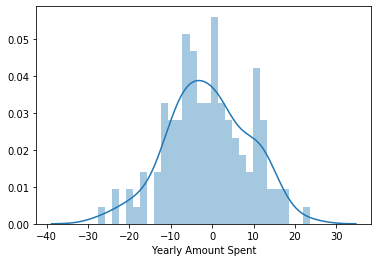

In [37]:
# Checking for Normality of Errors

sns.distplot(y_test-lr.predict(X_test), axlabel='Yearly Amount Spent', bins=30)

## Comments:
---
Based on the histogram, the residuals look normally distributed, so our data was alright.

<a id='6'></a>

# 6. Conclusion and Recommendations

As a recap, the business question was whether the company should focus on the Mobile Application, or on their Website.

## Recommendation 1: Focus on Mobile Application
Based on the coefficients table shown above, the coefficient of the `Time on App` was about 38.340, significantly higher than the coefficient for `Time on Website` of about 0.754.

Therefore, the company should focus on the Mobile Application since a one unit increase in `Time on App` is associated with an increase of $38.34 spent.

In contrast, a one unit increase for `Time on Website` is associated with only a $0.75 increase in `Yearly Amount Spent`.

It may be more worthwhile to invest in the Mobile Application instead of the Website.

## Recommendation 2: Focus on Customer Loyalty
Based on the coefficients table again, it is evident that the most influential feature is `Length of Membership`. This is intuitive, since a customer is likely to spend more if he/she is a member for a longer time.

It may be worthwhile for the company to consider customer loyalty rewards, to retain customers for a longer period of time.

## Recommendation 3: Improve Website
The low coefficent for `Time on Website` could indicate a sub-par company website.

The company may find it worthwhile to consider investing in developing their website so that it may facilitate more purchases, resulting in greater `Yearly Amount Spent`.

In [38]:
# Getting the runtime of notebook

print(f"Run complete, total time taken \u2248 {time.time()-t0:.2f}s")

Run complete, total time taken ≈ 9.57s
